<a href="https://colab.research.google.com/github/Juthathip-Saetan/Kaggle_Dataset_Spaceship_Titanic/blob/main/Kaggle_Dataset_Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kaggle Dataset - Spaceship Titanic**

Predict which passengers are transported to an alternate dimension

**The outline of this project**
+ Drop some unnecessary columns

+ Fill in missing data

+ Encode the data

+ Train XGBoost model with GridSearchCV on training set

+ Train Random Forest model.

Download the dataset to the program.

In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/train.csv') 

In [ ]:
dataset.shape

(8693, 14)

In [ ]:
dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


Divide the dataset into X and y.

In [ ]:
y = dataset['Transported']

In [ ]:
X = dataset.drop(['Transported'], axis=1)

In [ ]:
y.shape

(8693,)

In [ ]:
X.shape

(8693, 13)

Split X and y to training and test set.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape

(6954, 13)

In [ ]:
y_train.shape

(6954,)

In [ ]:
X_test.shape

(1739, 13)

In [ ]:
y_test.shape

(1739,)

In [ ]:
X_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
2841,3065_01,Europa,False,D/94/P,55 Cancri e,37.0,False,0.0,2065.0,1650.0,356.0,1.0,Solark Preeldy
5787,6130_01,Europa,False,C/189/P,55 Cancri e,33.0,True,0.0,3095.0,0.0,197.0,40.0,Sariton Fatchanble
1288,1368_01,Earth,True,G/208/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Iandy Lanks
4205,4482_03,Earth,False,G/732/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Ally Bartines
7725,8243_01,Earth,False,G/1331/S,TRAPPIST-1e,18.0,False,0.0,44.0,0.0,795.0,69.0,Jonard Cooks


In [ ]:
dataset['Destination'].unique() 

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


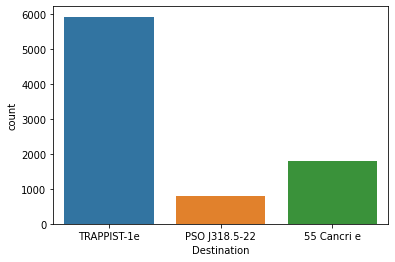

In [ ]:
import seaborn as sns
sns.countplot(dataset['Destination'])

In [ ]:
dataset.isnull().sum()/len(dataset)

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [ ]:
dataset.isnull()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8689,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8690,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8691,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataset.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Check null values 

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 2841 to 912
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6954 non-null   object 
 1   HomePlanet    6792 non-null   object 
 2   CryoSleep     6782 non-null   object 
 3   Cabin         6793 non-null   object 
 4   Destination   6807 non-null   object 
 5   Age           6812 non-null   float64
 6   VIP           6781 non-null   object 
 7   RoomService   6813 non-null   float64
 8   FoodCourt     6809 non-null   float64
 9   ShoppingMall  6786 non-null   float64
 10  Spa           6809 non-null   float64
 11  VRDeck        6802 non-null   float64
 12  Name          6790 non-null   object 
dtypes: float64(6), object(7)
memory usage: 760.6+ KB


Check the percentage of null values on each column

In [ ]:
X_train.isnull().sum()/len(X_train)

PassengerId     0.000000
HomePlanet      0.023296
CryoSleep       0.024734
Cabin           0.023152
Destination     0.021139
Age             0.020420
VIP             0.024878
RoomService     0.020276
FoodCourt       0.020851
ShoppingMall    0.024159
Spa             0.020851
VRDeck          0.021858
Name            0.023584
dtype: float64

Check the number of unique items in Cabin column. it is 0.78 that is high percentage. we decide to drop it



In [ ]:
X_train.nunique()/len(X_train)

In [ ]:
X_train['Cabin'].unique()

array(['D/94/P', 'C/189/P', 'G/208/P', ..., 'C/38/P', 'F/720/P',
       'C/320/S'], dtype=object)

In [ ]:
X_train['Cabin'].nunique()

5443

In [ ]:
X_train['Cabin'].nunique()/len(X_train)

0.7827149841817659

In [ ]:
X_train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [ ]:
X_train['HomePlanet'].nunique()

3

In [ ]:
X_train['HomePlanet'].nunique()/len(X_train)

0.0004314063848144953

In [ ]:
len(X_train)

6954

Let's delete the Cabin/ PassengerId/ name/ columns for simplicity



In [ ]:
X_train.drop(['PassengerId','Cabin','Name'], axis=1, inplace=True)
X_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
2841,Europa,False,55 Cancri e,37.0,False,0.0,2065.0,1650.0,356.0,1.0
5787,Europa,False,55 Cancri e,33.0,True,0.0,3095.0,0.0,197.0,40.0
1288,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
4205,Earth,False,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0
7725,Earth,False,TRAPPIST-1e,18.0,False,0.0,44.0,0.0,795.0,69.0
...,...,...,...,...,...,...,...,...,...,...
3252,Earth,False,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,6.0,607.0
4669,Earth,False,TRAPPIST-1e,32.0,False,2756.0,125.0,9.0,0.0,103.0
7973,Europa,False,55 Cancri e,56.0,False,53.0,3033.0,0.0,140.0,6102.0
3956,Mars,False,TRAPPIST-1e,32.0,False,1331.0,416.0,0.0,665.0,64.0


In [ ]:
X_train.shape

(6954, 10)

Fill in missing value



In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 2841 to 912
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6792 non-null   object 
 1   CryoSleep     6782 non-null   object 
 2   Destination   6807 non-null   object 
 3   Age           6812 non-null   float64
 4   VIP           6781 non-null   object 
 5   RoomService   6813 non-null   float64
 6   FoodCourt     6809 non-null   float64
 7   ShoppingMall  6786 non-null   float64
 8   Spa           6809 non-null   float64
 9   VRDeck        6802 non-null   float64
dtypes: float64(6), object(4)
memory usage: 597.6+ KB


In [ ]:
float64_columns = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
object_columns = ['HomePlanet','CryoSleep','Destination','VIP']

In [ ]:
from sklearn.impute  import SimpleImputer
import numpy as np

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [ ]:
imp_median.fit(X_train[float64_columns])
imp_mode.fit(X_train[object_columns])

SimpleImputer(strategy='most_frequent')

In [ ]:
imp_median.feature_names_in_

array(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype=object)

In [ ]:
imp_median.statistics_

array([27.,  0.,  0.,  0.,  0.,  0.])

In [ ]:
imp_mode.feature_names_in_

array(['HomePlanet', 'CryoSleep', 'Destination', 'VIP'], dtype=object)

In [ ]:
imp_mode.statistics_

array(['Earth', False, 'TRAPPIST-1e', False], dtype=object)

In [ ]:
X_train[float64_columns] = imp_median.transform(X_train[float64_columns])

In [ ]:
X_train[object_columns] = imp_mode.transform(X_train[object_columns])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 2841 to 912
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6954 non-null   object 
 1   CryoSleep     6954 non-null   object 
 2   Destination   6954 non-null   object 
 3   Age           6954 non-null   float64
 4   VIP           6954 non-null   object 
 5   RoomService   6954 non-null   float64
 6   FoodCourt     6954 non-null   float64
 7   ShoppingMall  6954 non-null   float64
 8   Spa           6954 non-null   float64
 9   VRDeck        6954 non-null   float64
dtypes: float64(6), object(4)
memory usage: 597.6+ KB


Lets encode the data

In [ ]:
X_train[object_columns]

,HomePlanet,CryoSleep,Destination,VIP
2841,Europa,False,55 Cancri e,False
5787,Europa,False,55 Cancri e,True
1288,Earth,True,TRAPPIST-1e,False
4205,Earth,False,TRAPPIST-1e,False
7725,Earth,False,TRAPPIST-1e,False
...,...,...,...,...
3252,Earth,False,TRAPPIST-1e,False
4669,Earth,False,TRAPPIST-1e,False
7973,Europa,False,55 Cancri e,False
3956,Mars,False,TRAPPIST-1e,False


In [ ]:
for col in object_columns:
  print(col,": ",X_train[col].unique())

HomePlanet :  ['Europa' 'Earth' 'Mars']
CryoSleep :  [False True]
Destination :  ['55 Cancri e' 'TRAPPIST-1e' 'PSO J318.5-22']
VIP :  [False True]


In [ ]:
ordinal_columns = ['CryoSleep','VIP']
nominal_columns = ['HomePlanet','Destination']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_enc = OrdinalEncoder()

In [ ]:
ordinal_enc.fit(X_train[ordinal_columns])

OrdinalEncoder()

In [ ]:
ordinal_enc.feature_names_in_

array(['CryoSleep', 'VIP'], dtype=object)

In [ ]:
 ordinal_enc.categories_

[array([False, True], dtype=object), array([False, True], dtype=object)]

In [ ]:
X_train[ordinal_columns] = ordinal_enc.transform(X_train[ordinal_columns])
X_train[ordinal_columns]

,CryoSleep,VIP
2841,0.0,0.0
5787,0.0,1.0
1288,1.0,0.0
4205,0.0,0.0
7725,0.0,0.0
...,...,...
3252,0.0,0.0
4669,0.0,0.0
7973,0.0,0.0
3956,0.0,0.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot_enc = OneHotEncoder(handle_unknown='ignore')

onehot_enc.fit(X_train[nominal_columns])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
onehot_enc.feature_names_in_

array(['HomePlanet', 'Destination'], dtype=object)

In [ ]:
onehot_enc.categories_

[array(['Earth', 'Europa', 'Mars'], dtype=object),
 array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'], dtype=object)]

In [ ]:
onehot_enc.get_feature_names_out()

array(['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e'], dtype=object)

In [ ]:
encoded_nominal_columns = onehot_enc.get_feature_names_out()
encoded_nominal_columns

array(['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e'], dtype=object)

In [ ]:
X_train[encoded_nominal_columns] = onehot_enc.transform(X_train[nominal_columns]).toarray()
X_train[encoded_nominal_columns]

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
2841,0.0,1.0,0.0,1.0,0.0,0.0
5787,0.0,1.0,0.0,1.0,0.0,0.0
1288,1.0,0.0,0.0,0.0,0.0,1.0
4205,1.0,0.0,0.0,0.0,0.0,1.0
7725,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
3252,1.0,0.0,0.0,0.0,0.0,1.0
4669,1.0,0.0,0.0,0.0,0.0,1.0
7973,0.0,1.0,0.0,1.0,0.0,0.0
3956,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
X_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
2841,Europa,0.0,55 Cancri e,37.0,0.0,0.0,2065.0,1650.0,356.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5787,Europa,0.0,55 Cancri e,33.0,1.0,0.0,3095.0,0.0,197.0,40.0,0.0,1.0,0.0,1.0,0.0,0.0
1288,Earth,1.0,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4205,Earth,0.0,TRAPPIST-1e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7725,Earth,0.0,TRAPPIST-1e,18.0,0.0,0.0,44.0,0.0,795.0,69.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3252,Earth,0.0,TRAPPIST-1e,15.0,0.0,0.0,0.0,0.0,6.0,607.0,1.0,0.0,0.0,0.0,0.0,1.0
4669,Earth,0.0,TRAPPIST-1e,32.0,0.0,2756.0,125.0,9.0,0.0,103.0,1.0,0.0,0.0,0.0,0.0,1.0
7973,Europa,0.0,55 Cancri e,56.0,0.0,53.0,3033.0,0.0,140.0,6102.0,0.0,1.0,0.0,1.0,0.0,0.0
3956,Mars,0.0,TRAPPIST-1e,32.0,0.0,1331.0,416.0,0.0,665.0,64.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
X_train = X_train.drop(nominal_columns,axis=1)

In [ ]:
X_train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
2841,0.0,37.0,0.0,0.0,2065.0,1650.0,356.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5787,0.0,33.0,1.0,0.0,3095.0,0.0,197.0,40.0,0.0,1.0,0.0,1.0,0.0,0.0
1288,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7725,0.0,18.0,0.0,0.0,44.0,0.0,795.0,69.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3252,0.0,15.0,0.0,0.0,0.0,0.0,6.0,607.0,1.0,0.0,0.0,0.0,0.0,1.0
4669,0.0,32.0,0.0,2756.0,125.0,9.0,0.0,103.0,1.0,0.0,0.0,0.0,0.0,1.0
7973,0.0,56.0,0.0,53.0,3033.0,0.0,140.0,6102.0,0.0,1.0,0.0,1.0,0.0,0.0
3956,0.0,32.0,0.0,1331.0,416.0,0.0,665.0,64.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
y_train

2841     True
5787     True
1288    False
4205     True
7725    False
        ...  
3252    False
4669    False
7973    False
3956    False
912     False
Name: Transported, Length: 6954, dtype: bool

Let's encode target column y.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

label_enc.fit(y_train)

LabelEncoder()

In [ ]:
label_enc.classes_

array([False,  True])

In [ ]:
y_train = label_enc.transform(y_train)

In [ ]:
y_train

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
y_train.shape

(6954,)

Create and train the model XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

params_xgb = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(100, 210, 10),
    'learning_rate': [0.1, 0.01, 0.05]
}

gs_xgb = GridSearchCV(estimator=xgb , param_grid=params_xgb, cv=5, verbose=3, scoring='accuracy')

In [ ]:
gs_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 264 candidates, totalling 1320 fits
[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.797 total time=   0.8s
[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.797 total time=   0.5s
[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.798 total time=   0.6s
[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.782 total time=   0.7s
[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.788 total time=   0.5s
[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=110;, score=0.798 total time=   0.6s
[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=110;, score=0.795 total time=   0.6s
[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=110;, score=0.797 total time=   0.6s
[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=110;, score=0.782 total time=   0.6s
[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=110;, score=0.788 total

GridSearchCV(cv=5, estimator=XGBClassifier(nthread=4, seed=42),
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(100, 210, 10)},
             scoring='accuracy', verbose=3)

In [ ]:
gs_xgb.best_score_

0.7999712437095615

In [ ]:
gs_xgb.best_params_

{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 160}

Let's see the accuracy score on train set.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_train,gs_xgb.predict(X_train))

0.8310324992809893

Do the feature engineering process to X_test.



In [ ]:
X_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
3331,3578_01,Mars,True,NaN,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Clers Hac
3821,4083_01,Europa,False,C/146/S,TRAPPIST-1e,21.0,False,0.0,6190.0,1828.0,7.0,35.0,Tauvaah Clarty
8269,8830_01,Mars,False,E/578/S,TRAPPIST-1e,29.0,False,230.0,0.0,1404.0,464.0,0.0,Rankes Vloaf
6104,6446_02,Earth,True,G/1047/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Nelley Yatters
1284,1362_01,Earth,False,F/265/S,TRAPPIST-1e,23.0,False,0.0,1268.0,0.0,119.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3452,3714_02,Mars,False,D/116/S,PSO J318.5-22,33.0,False,33.0,397.0,354.0,NaN,0.0,Cowl Harta
3023,3276_01,Europa,False,A/29/P,TRAPPIST-1e,33.0,False,20.0,653.0,0.0,121.0,483.0,Prope Wirdley
470,0504_05,Europa,True,B/19/S,55 Cancri e,18.0,False,0.0,0.0,0.0,0.0,0.0,Azharga Unpasine
6557,6921_01,Europa,False,C/255/S,TRAPPIST-1e,22.0,False,0.0,1914.0,2090.0,100.0,0.0,Sadrix Stersetery


In [ ]:
X_test.drop(['PassengerId','Cabin','Name'],axis=1,inplace=True)

X_test[float64_columns] = imp_median.transform(X_test[float64_columns])
X_test[object_columns] = imp_mode.transform(X_test[object_columns])

X_test[ordinal_columns] = ordinal_enc.transform(X_test[ordinal_columns])
X_test[encoded_nominal_columns] = onehot_enc.transform(X_test[nominal_columns]).toarray()

X_test = X_test.drop(nominal_columns,axis=1)
X_test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
3331,1.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3821,0.0,21.0,0.0,0.0,6190.0,1828.0,7.0,35.0,0.0,1.0,0.0,0.0,0.0,1.0
8269,0.0,29.0,0.0,230.0,0.0,1404.0,464.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6104,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1284,0.0,23.0,0.0,0.0,1268.0,0.0,119.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3452,0.0,33.0,0.0,33.0,397.0,354.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3023,0.0,33.0,0.0,20.0,653.0,0.0,121.0,483.0,0.0,1.0,0.0,0.0,0.0,1.0
470,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6557,0.0,22.0,0.0,0.0,1914.0,2090.0,100.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
y_test

3331     True
3821     True
8269    False
6104     True
1284    False
        ...  
3452    False
3023    False
470      True
6557     True
4175     True
Name: Transported, Length: 1739, dtype: bool

In [ ]:
y_test = label_enc.transform(y_test)
y_test

array([1, 1, 0, ..., 1, 1, 1])

Let's see the accuracy score on test set



In [ ]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,gs_xgb.predict(X_test))

0.7826336975273146

Load the Kaggle test dataset



In [ ]:
import pandas as pd
X_real_world = pd.read_csv('/content/test.csv')

X_real_world

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
X_real_world.drop(['PassengerId','Cabin','Name'],axis=1,inplace=True)

X_real_world[float64_columns] = imp_median.transform(X_real_world[float64_columns])
X_real_world[object_columns] = imp_mode.transform(X_real_world[object_columns])

X_real_world[ordinal_columns] = ordinal_enc.transform(X_real_world[ordinal_columns])
X_real_world[encoded_nominal_columns] = onehot_enc.transform(X_real_world[nominal_columns]).toarray()

X_real_world = X_real_world.drop(nominal_columns,axis=1)
X_real_world

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4273,0.0,42.0,0.0,0.0,847.0,17.0,10.0,144.0,1.0,0.0,0.0,0.0,0.0,1.0
4274,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4275,0.0,27.0,0.0,0.0,2680.0,0.0,0.0,523.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
gender_submission = pd.read_csv('/content/sample_submission.csv')
gender_submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [ ]:
gs_xgb_submission = gender_submission.copy()

Use our model to predict the Kaggle test data



In [ ]:
y_pred = gs_xgb.predict(X_real_world)
label_enc.inverse_transform(y_pred)

array([ True, False,  True, ...,  True,  True,  True])

inverse transform y



In [ ]:
y_pred = label_enc.inverse_transform(y_pred)

In [ ]:
gs_xgb_submission['Transported'] = y_pred
gs_xgb_submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
gs_xgb_submission.to_csv('/content/gs_xgb_submission.csv',index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred1 = random_forest.predict(X_test)

In [ ]:
random_forest.score(X_train, y_train)

0.9309749784296808

In [ ]:
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

93.1

In [ ]:
accuracy_score(y_test,Y_pred1)

0.7763082231167338

In [ ]:
random_forest.predict(X_real_world)

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
random_forest_submission = gender_submission.copy()

In [ ]:
y_pred1 = random_forest.predict(X_real_world)
label_enc.inverse_transform(y_pred1)

array([ True, False,  True, ...,  True,  True, False])

In [ ]:
y_pred1 = label_enc.inverse_transform(y_pred1)

In [ ]:
random_forest_submission['Transported'] =  y_pred1
random_forest_submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
random_forest_submission.to_csv('/content/Random_forest_submission.csv',index=False)